In [1]:
import numpy as np
import os
import requests
from datetime import date,timedelta,datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

Exercício 1. Escreva uma função cuja entrada sejam duas matrizes, A e B, e a saída seja a matriz
resultante do produto das entradas. Não utilize nenhuma função de multiplicação de matrizes
pronta, faça você mesmo os loops necessários para a multiplicação. Coloque uma mensagem de
erro quando o número de colunas de A não for igual ao número de linhas de B. Utilize as arrays
do numpy.

In [17]:
def multiply_matrix(matrix1,matrix2):

    #Validation
    if matrix1.shape[1] == matrix2.shape[0]:

        lines1 = matrix1.shape[0]
        columns2 = matrix2.shape[1]
        equalLen = matrix1.shape[1]

        newMatrix = np.zeros((lines1,columns2))

        for i in range(lines1):
            for j in range(columns2):
                for x in range(equalLen):
                    newMatrix[i,j] += matrix1[i,x] * matrix2[x,j] 

        return newMatrix

    else:
        raise ValueError('The # of columns of the 1st matrix is not equal to the # of lines of 2nd matrix')

array([[ 25.,  19.,  19.,  12.],
       [ 73.,  58.,  55.,  39.],
       [121.,  97.,  91.,  66.]])

Exercício 2. Crie uma função que tenha como entrada uma matriz qualquer M × N e como saída
a média e o desvio padrão dos elementos dessa matriz.

In [33]:
def operate_matrix(matrix):

    rows = matrix.shape[0]
    columns = matrix.shape[1]
    numberItems = rows * columns

    if numberItems > 0:

        itemsList = []

        for i in range(rows):
            itemsList.extend(matrix[i])

        mean = sum(itemsList)/numberItems
        diff = [(x - mean)**2 for x in itemsList]
        std = np.sqrt(sum(diff)/(numberItems - 1))

        print(
            f'For matrix \n{matrix}', 
            f'The mean is: {mean}',
            f'The Standard Deviation is: {std:.3f}',
            sep="\n")
    else:
        raise ZeroDivisionError('The matrix used is empty!')

Exercício 3. Crie uma matriz N × N de números aleatórios com valores entre −2 e 2. Utilize a
função do exercício anterior para calcular a média e o desvio padrão dos elementos dessa matriz.
O que acontece com esses valores quando N → ∞? Dica: o numpy tem uma função que gera
números aleatórios.

In [36]:
def operate_random_matrix(N):

    randomMatrix = np.random.randint(-2,2,size=(N,N))

    return operate_matrix(randomMatrix)

In [43]:
operate_random_matrix(10000)

For matrix 
[[ 1 -1 -1 ...  0 -2 -2]
 [ 1  0 -2 ...  0 -1  0]
 [-1  0  1 ...  1  0 -2]
 ...
 [ 0  0 -2 ...  0 -1  0]
 [ 0 -2 -2 ... -2 -1  0]
 [-1 -2 -2 ...  1  1 -1]]
The mean is: -0.50000195
The Standard Deviation is: 1.118


1.000
The mean is: -0.499954
The Standard Deviation is: 1.119 

2.000
The mean is: -0.500002
The Standard Deviation is: 1.118

5.000
The mean is: -0.49988052
The Standard Deviation is: 1.118

10.000
The mean is: -0.50000195
The Standard Deviation is: 1.118

Exercício 4. Desenvolva um programa que pede o nome e a idade do usuário (use a função input)
e imprime esses valores em um arquivo texto de saída. Depois desenvolva um programa para ler os
dados desse arquivo texto e imprimir o resultado na tela. Observação: a variável obtida a partir
da função input é sempre do tipo string. Se você quiser utilizar o valor de entrada como int ou
float você tem que fazer a conversão.


In [45]:
def  user_interview():

    name = input("What is your name?")
    age = int(input("How old are you?"))

    print(f"Hello, {name} aged {age} years.")

Exercício 5. Crie um jogo de pedra, papel e tesoura. Utilize a função input para pegar a opção do
jogador humano e utilize números aleatórios para gerar a resposta do computador. Faça primeiro
um jogo que tenha a mesma probabilidade de vitória, derrota ou empate. Depois desenvolva
um jogo em que a probabilidade do computador vencer seja maior, utilizando também números
aleatórios. Faça alguns testes.

In [142]:
def rock_paper_scissors_fair():

    print('Welcome to the Rock, Paper, Scissors game!\n')

    tryAgain = ''

    scoreUser = 0
    scoreComputer = 0

    while tryAgain == '':

        userInput = input('Please, write "rock", "paper" or "scissors", for Rock, Paper or Scissors, respectively.')\
            .lower()

        resultDic = {
            'paper':'rock',
            'rock':'scissors',
            'scissors':'paper'}

        resultList = [(k,v) for k,v in resultDic.items()]

        responseList = list(resultDic.keys())
        numberResponses = len(responseList)

        if userInput in responseList:

            randomResponse = responseList[np.random.randint(0,numberResponses)]

            for i in range(numberResponses):

                if set([userInput,randomResponse]) == set(resultList[i]):
                
                    if userInput == resultList[i][0]:
                        print('You won!')
                        scoreUser += 1

                    else:
                        print('You lost!')
                        scoreComputer += 1

                else:
                    print(f'Draw!')

            print(
                f'\nYou played: {userInput.title()}',
                f'The computer played: {randomResponse.title()}\n',
                f'Your score: {scoreUser}',
                f"Computer's score: {scoreComputer}\n",
                sep="\n")
            
            tryAgain = input('Do you want to play again? Press ENTER to continue')

            os.system('CLS')

        else:
            print('Your input is not valid! Please try again\n')

In [ ]:
def rock_paper_scissors_unfair():

    print('Welcome to the Rock, Paper, Scissors game!\n')

    tryAgain = ''

    scoreUser = 0
    scoreComputer = 0

    while tryAgain == '':

        userInput = input('Please, write "rock", "paper" or "scissors", for Rock, Paper or Scissors, respectively.')\
            .lower()

        # dictionary keys are the winning choice
        resultDic = {
            'rock':'paper',
            'scissors':'rock',
            'paper':'scissors'}
        
        responseList = list(resultDic.keys())
        resultList = [(k,v) for k,v in resultDic.items()]

        if userInput in responseList:

            if np.random.randint(0,11) % 2 == 0:
                
                randomResponse = resultDic[userInput]

            else:

                randomResponse = responseList[np.random.randint(0,len(responseList))]

            for i in range(3):

                if set([userInput,randomResponse]) == set(resultList[i]):
                
                    if userInput == resultList[i][1]:
                        print('You won!')
                        scoreUser += 1

                    else:
                        print('You lost!')
                        scoreComputer += 1

                else:
                    print(f'Draw!')

            print(
                f'\nYou played: {userInput.title()}',
                f'The computer played: {randomResponse.title()}\n',
                f'Your score: {scoreUser}',
                f"Computer's score: {scoreComputer}\n",
                sep="\n")
            
            tryAgain = input('Do you want to play again? Press ENTER to continue')

            os.system('CLS')

        else:
            print('Your input is not valid! Please try again\n')

Exercício 6. Faça um gráfico com o valor do dólar comercial nos últimos 20 dias. Utilize pontos
e linhas. Personalize o seu gráfico

In [5]:
def dollar_graph(numberDays):

    def timestamp_to_date(row):

        date = datetime.strptime(row['dataHoraCotacao'].split(' ')[0], '%Y-%m-%d')

        return str(datetime.strftime(date,'%d-%m-%y'))

    endDate = date.today()
    startDate = endDate - timedelta(days = numberDays)

    startDate = str(datetime.strftime(startDate, '%m-%d-%Y'))
    endDate = str(datetime.strftime(endDate, '%m-%d-%Y'))

    req = requests.get(f"https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='{startDate}'&@dataFinalCotacao='{endDate}'&$format=json&$select=cotacaoCompra,dataHoraCotacao")

    df = pd.json_normalize(req.json()['value'])

    df['date'] = df.apply(timestamp_to_date, axis=1)

    df.drop(labels=['dataHoraCotacao'],axis = 1,inplace=True)

    fig, axes = plt.subplots(figsize = (15,5))

    sns.set_theme(style="darkgrid")

    sns.lineplot(data = df, x = 'date',y = 'cotacaoCompra',color = '#a7c957',linewidth = 2)

    plt.axvline(
    x = '31-10-22',
    color = "#bc4749",
    label = "Elections", 
    linestyle = '--', 
    linewidth = 2)

    axes.xaxis.set_major_locator(MaxNLocator(10)) 
    axes.yaxis.set_major_formatter('$ {x:1.2f}')

    plt.legend(fontsize = 14)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.xlabel('')
    plt.ylabel('')

    plt.title(
        f'USD to BRL last {numberDays} days', 
        fontsize = 16, 
        y = 1.02,
        x = 0.1)

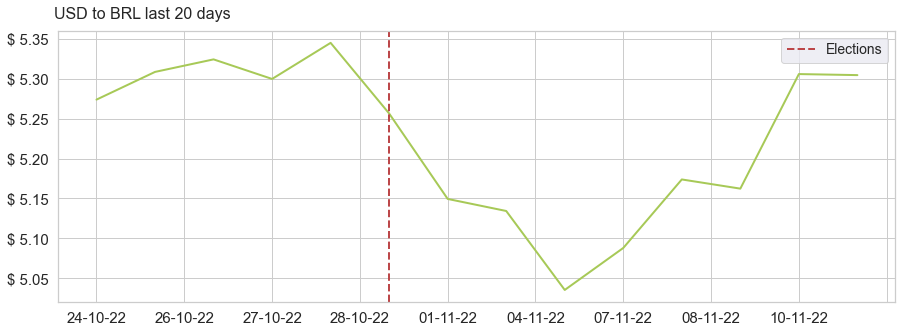

In [6]:
dollar_graph(20)

### Equações Não Lineares

**Exercício 7.** Encontre a raiz x ∗ ≈ 8.51 da equação usando o método do ponto fixo.<br>


$$f(x) = 2 cosh(x/4) − x = 0 (1)$$


In [5]:
def ponto_fixo(g,x0,atol):
  k,dif = 0,2*atol

  while dif >= atol:
    x1 = g(x0)

    dif = abs(x1 - x0)

    x0 = x1

    k += 1

    print(f'Iteração k = {k}, x: {x1:.3f}')

  print(f'\n\nA solução é {x1:.5f}')

def g(x):
    return 4*np.arccosh(x/2)

In [10]:
ponto_fixo(g,10,1.e-8)

Iteração k = 1, x: 9.170
Iteração k = 2, x: 8.815
Iteração k = 3, x: 8.653
Iteração k = 4, x: 8.577
Iteração k = 5, x: 8.541
Iteração k = 6, x: 8.523
Iteração k = 7, x: 8.515
Iteração k = 8, x: 8.511
Iteração k = 9, x: 8.509
Iteração k = 10, x: 8.508
Iteração k = 11, x: 8.508
Iteração k = 12, x: 8.507
Iteração k = 13, x: 8.507
Iteração k = 14, x: 8.507
Iteração k = 15, x: 8.507
Iteração k = 16, x: 8.507
Iteração k = 17, x: 8.507
Iteração k = 18, x: 8.507
Iteração k = 19, x: 8.507
Iteração k = 20, x: 8.507
Iteração k = 21, x: 8.507
Iteração k = 22, x: 8.507
Iteração k = 23, x: 8.507
Iteração k = 24, x: 8.507
Iteração k = 25, x: 8.507
Iteração k = 26, x: 8.507


A solução é 8.50720


**Exercício 8.** Encontre as raízes da equação utilizando o método da secante. <br>
$$f(x) = 2 cosh(x/4) − x = 0$$

In [11]:
def metodo_da_secante(f,x0,x1,atol):
  k,dif = 1, 2*atol

  while dif >= atol:
    x2 = x1 - (f(x1)*(x1 - x0)) / (f(x1) - f(x0))

    dif = abs(x2 - x1)

    x0 = x1
    x1 = x2
    k += 1

    print(f'Iteração k = {k}, x2: {x2:.3f}')

  print(f'\n\nA solução é {x2:.5f}')

def f(x):
  return 2*np.cosh(x/4) - x

In [13]:
metodo_da_secante(f,x0 = 5,x1 = 10,atol = 1.e-4)

Iteração k = 2, x2: 6.754
Iteração k = 3, x2: 7.852
Iteração k = 4, x2: 8.997
Iteração k = 5, x2: 8.425
Iteração k = 6, x2: 8.498
Iteração k = 7, x2: 8.507
Iteração k = 8, x2: 8.507
Iteração k = 9, x2: 8.507


A solução é 8.50720


**Exercício 9.** Utilizando a função do exercício anterior, compare a convergência para o resultado
final obtida pelos 4 métodos: bissecção, ponto fixo, Newton e Secante. <br>Faça um gráfico de $k × e_k$,
com $e_k = |x∗ − x_k|$ sendo o erro da iteração k, comparando os métodos (utilize escala logarítmica
para $e_k$).<br> Comente os seus resultados. Considere as duas raízes como sendo x∗ = 2.3575510538774
e x∗ = 8.5071995707130 e utilize uma tolerância de 10−10.

In [84]:
def erro_calc(x,x_goal):
  return abs(x - x_goal)

def bissecao_graf(f,a,b,atol,x_goal):
  kmax = np.log2((b-a)/(2*atol))
  k = 0
  erro = []

  if f(a)*f(b) > 0:
    raise ValueError()

  while (k <= kmax + 1):
    pk = (a+b)/2

    if f(a)*f(b) < 0:
      b = pk

    else:
      a = pk

    k += 1

    erro.append(erro_calc((a + b)/2,x_goal))

  return erro
  

def ponto_fixo_graf(g,x0,atol,x_goal):
  k,dif = 0,2*atol
  erro = []

  while dif >= atol:
    x1 = g(x0)

    dif = abs(x1 - x0)

    x0 = x1

    k += 1
    erro.append(erro_calc(x1,x_goal))

  return erro

def metodo_de_newton_graf(f,f_linha,x0,atol,x_goal):

  erro = []

  k,dif = 0, 2*atol

  while dif >= atol:
    x1 = x0 - (f(x0)/f_linha(x0))

    dif = abs(x1 - x0)

    k += 1

    x0 = x1

    erro.append(erro_calc(x1,x_goal))

  return erro

def metodo_da_secante_graf(f,x0,x1,atol,x_goal):
  k,dif = 1, 2*atol
  erro = []

  while dif >= atol:
    x2 = x1 - (f(x1)*(x1 - x0)) / (f(x1) - f(x0))

    dif = abs(x2 - x1)
    x0 = x1
    x1 = x2
    k += 1

    erro.append(erro_calc(x1,x_goal))

  return erro

def f_linha(x):
  return 0.5*(np.sinh(x/4) - 2)

def f_ponto(x):
  return 2*np.cosh(x/4)

def f_bissec(x):
  return 4*np.arccosh(x/2) - x

def f_ponto_2(x):
    return 4*np.arccosh(x/2)

In [82]:
def erro_graph(f,f_ponto,f_linha,x0,a,b,x_goal):

    atol = 1.e-10

    bissecArray = bissecao_graf(f_bissec,a,b,atol,x_goal)
    pontoFixoArray = ponto_fixo_graf(f_ponto,x0,atol,x_goal)
    newtonArray = metodo_de_newton_graf(f,f_linha,x0,atol,x_goal)
    secanteArray = metodo_da_secante_graf(f,a,b,atol,x_goal)

    # PLOTTING
    sns.set_theme(style="whitegrid")

    fig,ax = plt.subplots(figsize=(15, 5))

    plt.plot(bissecArray, label = 'Bissecção')
    plt.plot(pontoFixoArray, label = 'Ponto Fixo')
    plt.plot(newtonArray, label = 'Newton')
    plt.plot(secanteArray, label = 'Secante')

    plt.legend(fontsize = 14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.xlabel('Iterações',fontsize = 16)
    plt.ylabel('Erro',fontsize = 16)

    plt.yscale('log')

    plt.title(
        f'Comparação de métodos para x *= {x_goal}',
        fontsize = 17,
        y = 1.02
    )

    ax.set_xlim(left = 0)
    ax.set_ylim(top = 1)

    plt.show()


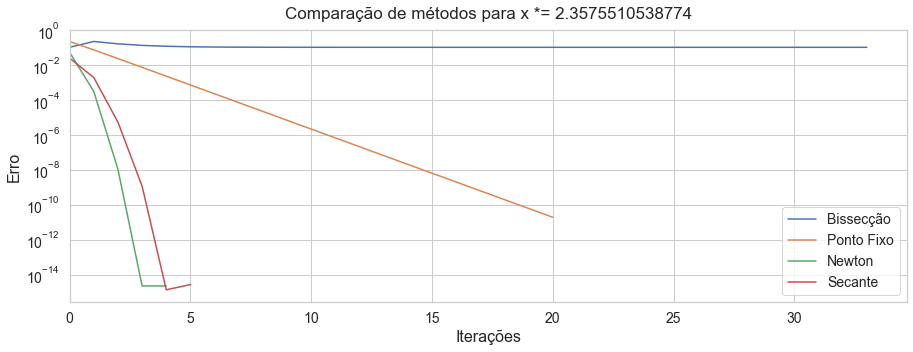

In [83]:
erro_graph(
    f = f,
    f_ponto = f_ponto,
    f_linha = f_linha,
    x0 = 3,
    a = 2,
    b = 3,
    x_goal = 2.3575510538774)

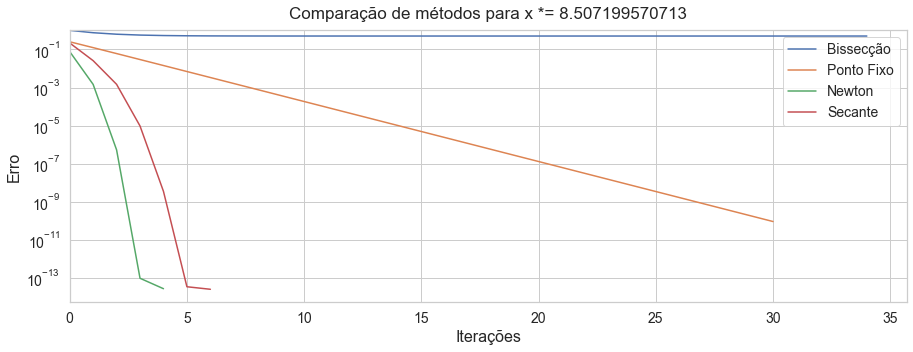

In [85]:
erro_graph(
    f = f,
    f_ponto = f_ponto_2,
    f_linha = f_linha,
    x0 = 8,
    a = 7,
    b = 9,
    x_goal = 8.5071995707130)

**Exercício 10.** Encontre um valor aproximado para $√2$ utilizando o método do ponto fixo.

[Fonte](https://www.ufrgs.br/reamat/CalculoNumerico/livro-sci/sdeduv-iteracao_de_ponto_fixo.html)

In [75]:
def ponto_fixo_babilonico(g,x0,atol):
  k,dif = 0,2*atol

  while dif >= atol:
    x1 =  (x0 + g(x0))/2

    dif = abs(x1 - x0)

    x0 = x1

    k += 1

    print(f'Iteração k = {k}, x: {x1:.3f}')

  print(f'\n\nA solução é {x1:.5f}')

def y(x):
  return 5/x

In [77]:

ponto_fixo_babilonico(g = y, x0 = 0.1, atol = 1.e-4)

Iteração k = 1, x: 25.050
Iteração k = 2, x: 12.625
Iteração k = 3, x: 6.510
Iteração k = 4, x: 3.639
Iteração k = 5, x: 2.507
Iteração k = 6, x: 2.251
Iteração k = 7, x: 2.236
Iteração k = 8, x: 2.236


A solução é 2.23607


**Exercício 11.** Desenvolva um código para o método da bissecção que verifique se $f(a) · f(b) < 0$
antes de iniciar o processo iterativo e que tenha um limite no número de iterações. Se o loop
alcançar esse limite, o código para e uma mensagem de erro é exibida. Coloque todo o método
dentro de uma função (do Python), com entradas e saídas de acordo com o algoritmo. Faça alguns
testes.

In [ ]:
def bissecao_ex12(f,a,b,atol):
  kmax = np.log2((b-a)/(2*atol)) + 1
  k = 0
  iterLimite = 100

  if kmax > iterLimite:
    iteracao = iterLimite
  else:
    iteracao = kmax

  if f(a)*f(b) < 0:
    
    while (k <= iteracao):
      pk = (a+b)/2

      if f(a)*f(b) < 0:
        b = pk

      else:
        a = pk

      k += 1
      print(f'Iteracão: {k}, Valor de p: {pk:.9f}')
    
    x = (a+b)/2

    print(f'\n\nA solução final é {x:.5f}')

  else:
    raise ValueError()

**Exercício 12.** Seja uma função f contínua em um intervalo $[a, b]$, com $f'$ e $f''$ também contínuas nesse intervalo. <br>Considere ainda que existe uma raiz $x∗ ∈ [a, b] \text{ tal que }f(x∗) = 0$ e  $f1(x*) \neq 0$.<br>
Nesse caso, mostre que o método de Newton tem convergência de segunda ordem.

??

**Exercício 13.** Use um polinômio de Taylor em torno de 45° para aproximar $cos(41°)$ com uma precisão de $10^{−6}$.

In [119]:
def cos(x):
    return np.cos(x)

def sin(x):
    return np.sin(x)

def angle2radians(angle):
    return (angle * np.pi)/180

def taylor(x0,x,f,f_linha,tol = 1.e-6):

    dif = 2*tol
    i = 1

    x0,x = angle2radians(x0),angle2radians(x)

    taylor = f(x0)

    while dif > tol:

        step = i%4

        if step == 0:
            function = f(x0)

        elif step == 1:
            function = -f_linha(x0)

        elif step == 2:
            function = -f(x0)

        elif step == 3:
            function = f_linha(x0)
        taylor += (function/np.math.factorial(i))*((x - x0)**i)

        dif = abs(taylor - f(x))

        i += 1

    print(f'Levou {i} iterações e o resultado foi {taylor:.5f}.')

In [120]:
taylor(x0 = 45, x = 41,f = cos,f_linha = sin)

Levou 4 iterações e o resultado foi 0.75471.


Exercício 14. Quando um fluido incompressível escoa em um tubo circular, em regime permanente, a queda de pressão $\Delta P$ devido ao atrito com a parede é dada pela equação $$\Delta P = -0.5 f \rho V^2 \left(\frac{L}{D}\right) (3),$$
em que $\rho$ é a densidade do fluido, V é a velocidade média, L é o comprimento do tubo e D é o diâmetro.<br> 
Na equação (3), f representa o fator de atrito de Darcy. Existem diferentes fórmulas empíricas para o fator f em função do número de Reynolds $Re = \rho V D /\mu$, em que $\mu$ é a viscosidade
dinâmica do fluido. <br>
Para um escoamento turbulento completamente desenvolvido em um tubo com
rugosidade de superfície $\epsilon$, o modelo desenvolvido por Colebrook é dado por $$\frac{1}{f^{1/2}} = -2\log_{10}\left(\frac{\epsilon/D}{3.7}+\frac{2.51}{Re f^{1/2}}\right). (4) $$

<br>Desenvolva um método numérico para calcular f, dados $\epsilon$/D e Re. 
<br>Utilize, como chute inicial em suas iterações, o valor aproximado de f dado por Generaux, $$f = 0.16Re^{−0.16} (5)$$
Faça um gráfico de Re × f para $\epsilon$/D = 0.001, com $10^4$ ≤ Re ≤ $10^7$


In [37]:
relativeRugosity = 0.001

def ponto_fixo_moody(g,x0,atol,reynolds):
    k,dif = 0,2*atol

    while dif >= atol:
        x1 = g(x0,reynolds)

        dif = abs(x1 - x0)

        x0 = x1

        k += 1

    return x1

def f_turbulent(f,reynolds):

    firstTerm = relativeRugosity/3.7
    secondTerm = 2.51/(reynolds*np.sqrt(f))

    # Solving Colebrook's equation (non linear)
    return (1/(2*np.log((firstTerm)+(secondTerm))))**2


def plotPoints():

    X = []
    Y = []

    print('Calculating Turbulent Flow\n')

    X = list(range(10**7,10**8,10**3))
        
    Y = []

    for reynolds in range(10**7,10**8,10**3):

        f0 = ponto_fixo_moody(
            g = f_turbulent,
            x0 = 0.16*reynolds*np.exp(-0.16),
            reynolds = reynolds,
            atol = 1.e-10)

        Y.append(f0)

    print('Turbulent Flow was just calculated\n')

    return X,Y

def plotImage(X,Y):

    print('Plotting Image\n')

    fig,ax = plt.subplots(figsize = (12,7))

    plt.plot(X,Y)

    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Times New Roman']

    plt.grid(which='major', linestyle='--', linewidth='1.0', color='k') 
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='k') 

    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())  

    plt.autoscale(enable=True, axis='both')
    plt.minorticks_on

    plt.title(
        'Moody Diagram',
        fontsize=22,
        y = 1.01)

    plt.xlabel(
        r'Reynolds Number, $Re = \frac{V d \rho}{\mu}$',
        fontsize= 18)

    plt.ylabel('Friction Factor, f',fontsize= 16)

    ax2 = ax.twinx()

    ax2.set_ylabel(r'$\frac{\epsilon}{d}$ = Relative Rugosity',
                    fontsize=16,
                    x = 1.3)

    ax2.set_yticks([])

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(which = 'minor',axis='y', labelsize=13)
    ax.tick_params(which = 'major',axis='y', labelsize=16)

    ax.set_xlim(10**7,10**8)

    plt.xscale('log')
    plt.yscale('log') 

    plt.show()

    fig.savefig(f'moody_diagram.png',bbox_inches='tight');

Calculating Turbulent Flow

Turbulent Flow was just calculated

Plotting Image



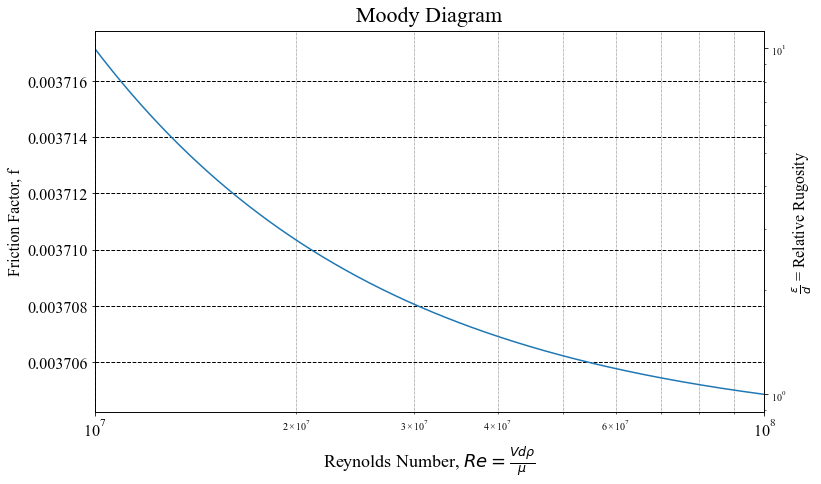

In [38]:
X,Y = plotPoints()

plotImage(X,Y)